In [12]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P Documents/pytorch_practiceMy/pytorch_practice/Coursera_Pytorch/Data


--2022-12-12 00:03:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... failed: Connection timed out.
Retrying.

--2022-12-12 00:05:55--  (try: 2)  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... failed: Connection timed out.
Retrying.

--2022-12-12 00:08:07--  (try: 3)  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDevel

In [13]:
!tar -xf img.tar.gz 

In [14]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2022-12-12 00:25:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M   132KB/s    in 17s     

2022-12-12 00:26:01 (95.5 KB/s) - ‘index.csv’ saved [1680905/1680905]



In [15]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [16]:
# These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [17]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [18]:
# Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

In [19]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [20]:
# Get the value on location row 0, column 1 (Notice that index starts at 0)
#rember this dataset has only 100 samples to make the download faster  
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


In [21]:
# Get the value on location row 0, column 0 (Notice that index starts at 0.)

print('y:', data_name.iloc[0, 0])

y: Ankle boot


In [22]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


In [23]:
# Print out the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


In [24]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1]
image_name

'img/fashion1.png'

In [25]:
image_path=os.path.join(directory,image_name)
image_path

'img/fashion1.png'

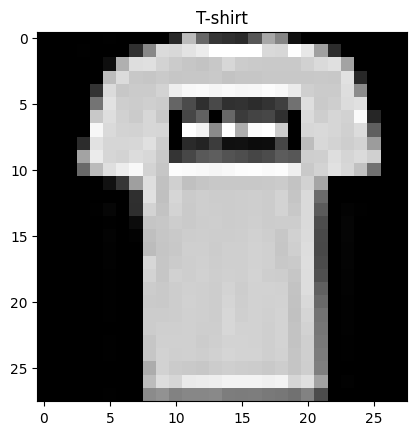

In [26]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

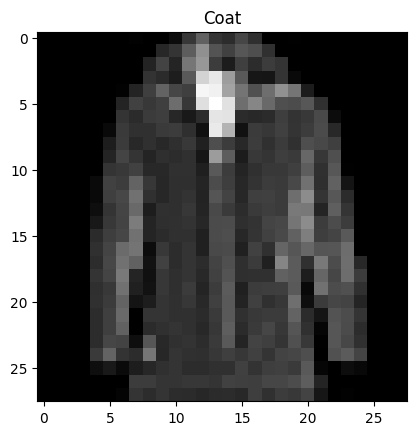

In [27]:
# Plot the 20th image

image_name = data_name.iloc[19, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[19, 0])
plt.show()

In [28]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [29]:
# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)

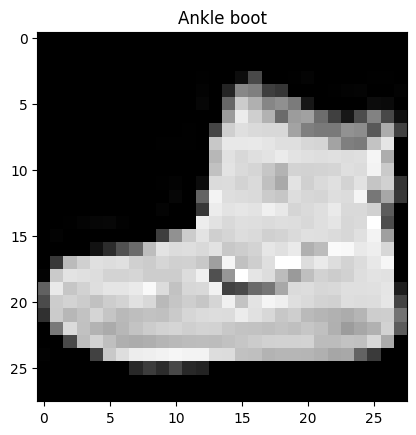

In [30]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [31]:
y

'Ankle boot'

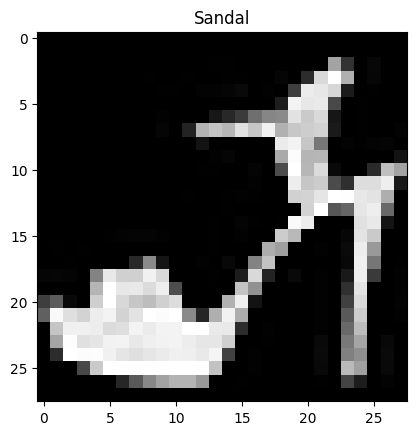

In [32]:
image=dataset[9][0]
y=dataset[9][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [33]:
import torchvision.transforms as transforms

In [34]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)


The shape of the first element tensor:  torch.Size([1, 20, 20])


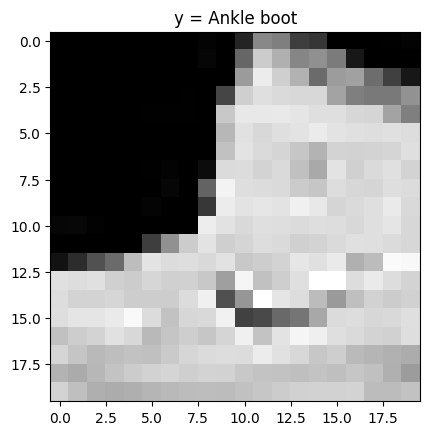

In [35]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))